In [22]:
#TensorFlow is an open-source software library.
#used for machine learning applications like neural networks.
#Keras is a high-level, deep learning API developed by Google for implementing
#neural networks.
#It is written in Python and is used to make the implementation of neural networks easy. 
#It also supports multiple backend neural network computation.

In [40]:
#a. Import the neccessary package
# from tensorflow import keras
# import matplotlib.pyplot as plt
# import numpy as np

import tensorflow as tf
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [25]:
#b. Load the training and testing data
# MNIST set is a large collection of handwritten digits. 

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) =mnist.load_data()

In [26]:
#60000 data from data set is assigned to x_train
# len(x_train)

#10000 data from data set is assigned to x_test
# len(x_test)

# this shows the 2d array(28,28) 28 array with 28 values
# x_train.shape

# x_test.shape

#array values of 2nd data
# x_train[2]

#we can change it by changing the argument
# plt.matshow(x_train[2])

In [27]:
#feature scaling
#Feature scaling is a method used to normalize the range of independent variable
#or features of data.
#In data processing, it is also known as data normalization and is generally 
#performed during the data preprocessing step
#to handle highly varying magnitudes or values or units.

x_train = x_train/255
x_test = x_test/255

In [28]:
#define the network architecture usig keras

# We create a Sequential model and add layers one at a time until we are happy
# with our network architecture. 
#The first thing to get right is to ensure the input layer has the correct 
#number of input features. 
#This can be specified when creating the first layer with the input_shape 
#argument and setting it to(8,) for presenting the eight input variables as a
# vector.

#Fully connected layers are defined using the Dense class. You can specify the 
#number of neurons or nodes in the layer as the first argument 
#and the activation function using the activation argument.

# The model expects rows of data with 8 variables (input_shape=(8,) argument).
# The first hidden layer has 128 nodes and uses the relu activation function.
# The second hidden layer has 10 nodes and uses the relu activation function.
# The output layer has one node and uses the softmax activation function.

#flatten use to reduce matrix into liner form that is one dimension

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),  #Fully connected layers
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [50]:
#train the model using SGD

# We will define the optimizer as the efficient stochastic gradient descent 
# algorithm “sgd“. This is a popular version of gradient descent because it 
# automatically tunes itself and gives good results in a wide range of problems.

# Sparse cross-entropy can be used in keras for multi-class classification by using

#Finally, because it is a classification problem, you will collect and report
#the classification accuracy defined via the metrics argument.

# An epoch is a term used in machine learning and indicates the number of passes
# of the entire training dataset the machine learning algorithm has completed. 
# Datasets are usually grouped into batches (especially when the amount of data 
# is very large)

#verbose is the choice that how you want to see the output of your Nural Network while 
#it's training. If you set verbose = 0, It will show nothing.

model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 635us/step - loss: 0.1042 - accuracy: 0.9711
Epoch 2/10
1875/1875 [==============================] - 1s 526us/step - loss: 0.1005 - accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 1s 530us/step - loss: 0.0972 - accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 1s 535us/step - loss: 0.0940 - accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 1s 542us/step - loss: 0.0910 - accuracy: 0.9750
Epoch 6/10
1875/1875 [==============================] - 1s 541us/step - loss: 0.0881 - accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 1s 556us/step - loss: 0.0853 - accuracy: 0.9765
Epoch 8/10
1875/1875 [==============================] - 1s 573us/step - loss: 0.0831 - accuracy: 0.9776
Epoch 9/10
1875/1875 [==============================] - 1s 540us/step - loss: 0.0807 - accuracy: 0.9782
Epoch 10/10
1875/1875 [==============================] - 1s 562u

In [51]:
#evaluate the network

#means calculating loss and accuracy on testing data

test_loss, test_acc=model.evaluate(x_test, y_test, verbose=0)
print("Loss=", test_loss)
print("Accuracy=", test_acc)

Loss= 0.0988093763589859
Accuracy= 0.9696000218391418


<function matplotlib.pyplot.show(close=None, block=None)>

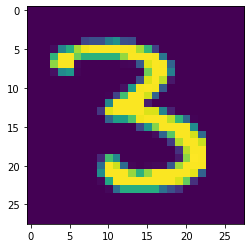

In [45]:
n = random.randint(6,9999)
plt.imshow(x_test[n])
plt.show

In [46]:
predicted_value = model.predict(x_test)

In [47]:
print("handwritten number is= %d" %np.argmax(predicted_value[n]))

handwritten number is= 3


<AxesSubplot:>

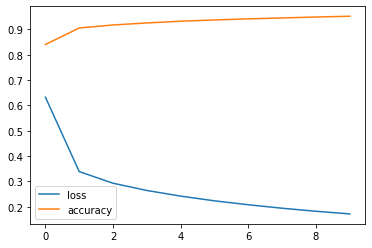

In [32]:
#f. plot the training loss and accuracy
pd.DataFrame(history.history).plot()